In [1]:
import sys
import cv2
import matplotlib.pyplot as plt
sys.path.insert(1, './../')

import pykinect_azure as pykinect
import numpy as np
import image_plot_utilities as ipu 

from pykinect_azure.k4a import _k4a
from pykinect_azure.k4a.capture import Capture
from pykinect_azure.k4a.transformation import Transformation
import scipy.io

In [2]:
import json
import time
import pickle
#import kinectpy as kpy
#from kinectpy.k4a._k4atypes import K4A_CALIBRATION_TYPE_DEPTH

In [12]:
device_config = pykinect.default_configuration
print(device_config)
#playback_calibration1 = playback1.get_calibration()
#print(playback_config1)
#print(playback_calibration1)

Device configuration: 
	color_format: 0 
	(0:JPG, 1:NV12, 2:YUY2, 3:BGRA32)

	color_resolution: 1 
	(0:OFF, 1:720p, 2:1080p, 3:1440p, 4:1536p, 5:2160p, 6:3072p)

	depth_mode: 3 
	(0:OFF, 1:NFOV_2X2BINNED, 2:NFOV_UNBINNED,3:WFOV_2X2BINNED, 4:WFOV_UNBINNED, 5:Passive IR)

	camera_fps: 2 
	(0:5 FPS, 1:15 FPS, 2:30 FPS)

	synchronized_images_only: False 
	(True of False). Drop images if the color and depth are not synchronized

	depth_delay_off_color_usec: 0 us. 
	Delay between the color image and the depth image

	wired_sync_mode: 0
	(0:Standalone mode, 1:Master mode, 2:Subordinate mode)

	subordinate_delay_off_master_usec: 0 us.
	The external synchronization timing.

	disable_streaming_indicator: False 
	(True or False). Streaming indicator automatically turns on when the color or depth camera's are in use.




In [17]:
if __name__ == "__main__":
    pykinect.initialize_libraries()

    for i in range(1, 3):
    #for i in range(1, 8):
        #video1_filename = "D:/SCULPT/Nahian/Video collected/check_mas"+str(i)+".mkv"
        video1_filename = "D:/SCULPT/Nahian/video feb 14/mas"+str(i)+"unb.mkv"
        print(video1_filename)
    

        playback1 = pykinect.start_playback(video1_filename)

        playback1.update()
        
        playback1.update()
        capture1=playback1.update()


        playback_calibration1 = playback1.get_calibration()
        playback_config1 = playback1.get_record_configuration()


        print(capture1)
        a=Capture.get_color_image(capture1)
        print(a[0])
        b=Capture.get_depth_image(capture1)

        c=Capture.get_transformed_depth_image(capture1)

        _, d=capture1.get_ir_image()
        
        #filename=r"D:\SCULPT\Nahian\Video collected\check_images\rgb\mas"+str(i)+".jpg"
        filename=r"D:\SCULPT\Nahian\video feb 14\rgb\mas"+str(i)+"unb.jpg"
        cv2.imwrite(filename, a[1])

        #filename=r"D:\SCULPT\Nahian\Video collected\check_images\depth\mas"+str(i)+".jpg"
        filename=r"D:\SCULPT\Nahian\video feb 14\depth\mas"+str(i)+"unb.mat"
        scipy.io.savemat(filename, mdict={'name':b[1]})

        #filename=r"D:\SCULPT\Nahian\Video collected\check_images\modified depth\mas"+str(i)+".jpg"
        filename=r"D:\SCULPT\Nahian\video feb 14\modified depth\mas"+str(i)+"unb.mat"
        #cv2.imwrite(filename, c[1])
        scipy.io.savemat(filename, mdict={'name':c[1]})


        filename=r"D:\SCULPT\Nahian\video feb 14\ir images\mas"+str(i)+"unb.mat"
        #cv2.imwrite(filename, c[1])
        scipy.io.savemat(filename, mdict={'name':d})
        playback1.close()

    #sub_ordinate   
    
    for i in range(1, 4):
    #for i in range(1, 8):
         #video1_filename = "D:/SCULPT/Nahian/Video collected/check_mas"+str(i)+".mkv"
        video1_filename = "D:/SCULPT/Nahian/video new/config"+str(i)+"_sub.mkv"
        print(video1_filename)
    

        playback1 = pykinect.start_playback(video1_filename)
        
        playback1.update()
        capture1=playback1.update()


        playback_calibration1 = playback1.get_calibration()
        playback_config1 = playback1.get_record_configuration()


        print(capture1)
        a=Capture.get_color_image(capture1)
        print(a[0])
        b=Capture.get_depth_image(capture1)

        c=Capture.get_transformed_depth_image(capture1)

        _, d=capture1.get_ir_image()
        
        #filename=r"D:\SCULPT\Nahian\Video collected\check_images\rgb\mas"+str(i)+".jpg"
        
        

        #filename=r"D:\SCULPT\Nahian\Video collected\check_images\depth\mas"+str(i)+".jpg"
        filename=r"D:\SCULPT\Nahian\video new\depth\sub"+str(i)+".mat"
        scipy.io.savemat(filename, mdict={'name':b[1]})

        #filename=r"D:\SCULPT\Nahian\Video collected\check_images\modified depth\mas"+str(i)+".jpg"
        filename=r"D:\SCULPT\Nahian\video new\modified depth\sub"+str(i)+".mat"
        #cv2.imwrite(filename, c[1])
        scipy.io.savemat(filename, mdict={'name':c[1]})


        filename=r"D:\SCULPT\Nahian\video new\ir images\sub"+str(i)+".mat"
        #cv2.imwrite(filename, c[1])
        scipy.io.savemat(filename, mdict={'name':d})
        playback1.close()

    
        
        
   

D:/SCULPT/Nahian/video feb 14/mas1unb.mkv
True
D:/SCULPT/Nahian/video feb 14/mas2unb.mkv
True
D:/SCULPT/Nahian/video new/config1_sub.mkv
True
D:/SCULPT/Nahian/video new/config2_sub.mkv
True
D:/SCULPT/Nahian/video new/config3_sub.mkv
True


8482


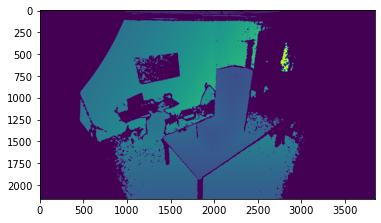

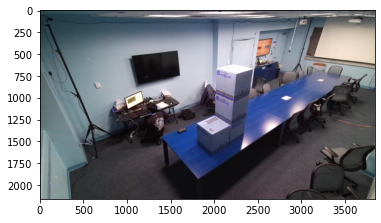

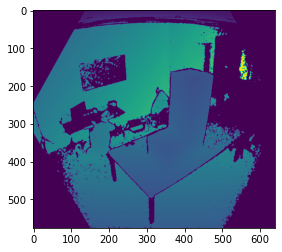

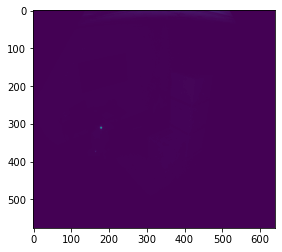

In [15]:
import matplotlib.pyplot as plt
plt.imshow(c[1])
plt.figure()
plt.imshow(a[1])
plt.figure()
plt.imshow(b[1])
plt.figure()
plt.imshow(d)

In [16]:
pykinect.initialize_libraries()


Record configuration: 
	color_format: 0 
	(0:JPG, 1:NV12, 2:YUY2, 3:BGRA32)

	color_resolution: 5 
	(0:OFF, 1:720p, 2:1080p, 3:1440p, 4:1536p, 5:2160p, 6:3072p)

	depth_mode: 2 
	(0:OFF, 1:NFOV_2X2BINNED, 2:NFOV_UNBINNED,3:WFOV_2X2BINNED, 4:WFOV_UNBINNED, 5:Passive IR)

	camera_fps: 0 
	(0:5 FPS, 1:15 FPS, 2:30 FPS)

	color_track_enabled: True 
	(True of False). If Color camera images exist

	depth_track_enabled: True 
	(True of False). If Depth camera images exist

	ir_track_enabled: True 
	(True of False). If IR camera images exist

	imu_track_enabled: False 
	(True of False). If IMU samples exist

	depth_delay_off_color_usec: 0 us. 
	Delay between the color image and the depth image

	wired_sync_mode: 0
	(0:Standalone mode, 1:Master mode, 2:Subordinate mode)

	subordinate_delay_off_master_usec: 0 us.
	The external synchronization timing.

	start_timestamp_offset_usec: 800222 us. 
	Start timestamp offset.




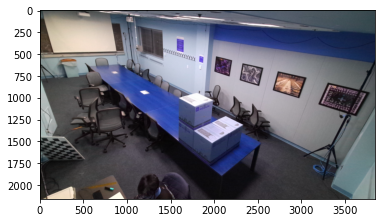

(2160, 3840, 3)


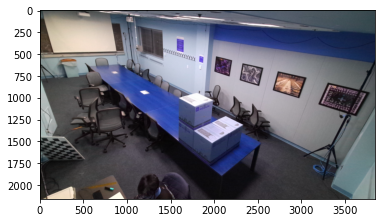

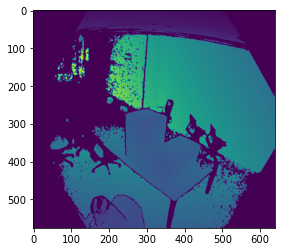

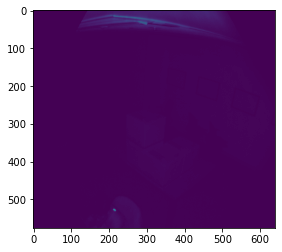

In [12]:

ret, depth_im=capture1.get_depth_image()

ret,ir_image=capture1.get_ir_image()

ret,mod_color=capture1.get_color_image()


print(mod_color.shape)

plt.imshow(mod_color)

plt.figure()

plt.imshow(depth_im)


#plt.figure()

#plt.imshow(mod_color)

#print(mod_color.max())
plt.figure()
plt.imshow(ir_image)


(576, 640, 4)


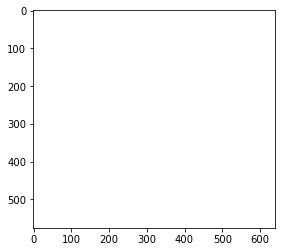

In [32]:
from pykinect_azure.k4a.transformation import Transformation

capture1.calibration_handle=cal_handle

ret,a= capture1.get_transformed_color_image()

print(a.shape)

plt.imshow(a)

In [39]:
imo = capture1.get_color_image_object()
depo = capture1.get_depth_image_object()
out = capture1.camera_transform.color_image_to_depth_camera(depo, imo)

In [18]:
### PIXEL TO MM IN KINECT CO-ORDINATES

uvcon1=[[317,431],[373,434],[343,383],[267,395],[325,333],[270,330]] #u=column, v=row of pixel
uvcon1=np.array(uvcon1)


uvcon2=[[381,410],[445,347],[247,274],[292,278]]
uvcon2=np.array(uvcon2)


uvcon3=[[366,378],[413,382],[326,291],[372,294],[382,227]]
uvcon3=np.array(uvcon3)



uvnew=[[350,466],[356,418],[394,395],[298,437],[300,390],[341,417],[336,465],[308,378],[346,359],[388,383],[350,404],[247,390],[246,345],[285,330],[283,374],[246,330],[245,279],[287,266],[285,315],[178,468],[154,443],[190,425],[216,448]]
uvnew=np.array(uvnew)
print(uvnew.shape)
from pykinect_azure.k4a import _k4atypes

(23, 2)


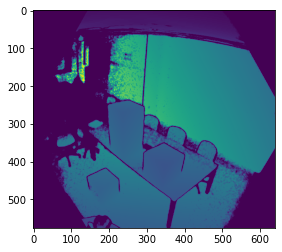

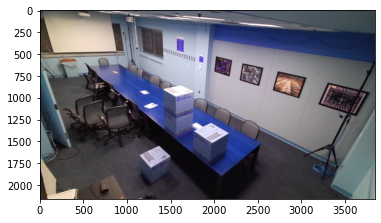

In [19]:
#this one


video1_filename1 = "D:/SCULPT/Nahian/video new/config1_mas.mkv"
video1_filename2= "D:/SCULPT/Nahian/video new/config2_mas.mkv"
video1_filename3= "D:/SCULPT/Nahian/video new/config3_mas.mkv"
video1_filename4= "D:/SCULPT/Nahian/video feb 14/mas1unb.mkv"
playback2 = pykinect.start_playback(video1_filename4)


playback2.update()

playback_config = playback2.get_record_configuration()
#print(playback_config)

depth_images=[]

for i in range(5):
	capture1 = playback2.update()
	cal_handle= playback2.get_calibration()
	
	ret, depth_im = capture1.get_depth_image()
	depth_images.append(depth_im)

depth_images=np.array(depth_images)
depth_image=depth_images.mean(axis=0)
depth_image.shape 

plt.imshow(depth_image)



		# Get the color image from the capture
ret, color_image = capture1.get_color_image()





		# Get the colored depth

ret,ir_image=capture1.get_ir_image()

		# Combine both images
#combined_image = cv2.addWeighted(color_image[:,:,:3], 0.7, depth_image, 0.3, 0)
	
		# Overlay body segmentation on depth image
plt.figure()
plt.imshow(color_image)
playback2.close()






In [20]:
x_all=[]
y_all=[]
z_all=[]

#Change the two lines below
uvcon=uvnew
filename=r"D:\SCULPT\Nahian\video feb 14\kinect.mat"


for i in range(len(uvcon)):

    ux=uvcon[i][0]
    vy=uvcon[i][1]
    z=depth_image[vy,ux]
    xy = _k4atypes.k4a_float2_t((ux, vy))

    out = cal_handle.convert_2d_to_3d(xy, z, 0,0)
    x_all.append(out.xyz.x)
    y_all.append(out.xyz.y)
    z_all.append(out.xyz.z)


x_all=np.array(x_all).reshape(len(uvcon),1)
y_all=np.array(y_all).reshape(len(uvcon),1)
z_all=np.array(z_all).reshape(len(uvcon),1)
print(x_all[0])

print(y_all[0])
print(z_all[0])
xyz=np.concatenate([x_all,y_all,z_all],axis=1)


        #cv2.imwrite(filename, c[1])
scipy.io.savemat(filename, mdict={'name':xyz})

print(xyz.shape)

[121.73124695]
[662.41235352]
[2717.60009766]
(23, 3)


In [21]:
zz  =cal_handle._handle.depth_camera_calibration
intr = zz.intrinsics.parameters.param
intr.fx, intr.fy, intr.cx, intr.cy

(504.8172302246094, 504.74493408203125, 327.8377685546875, 345.43280029296875)

[242.10388184]
[206.64347839]
[3192.]
(5, 3)


In [23]:

print(xyz)

[[ 1.21731247e+02  6.62412354e+02  2.71760010e+03]
 [ 1.42604462e+02  3.67525818e+02  2.53580005e+03]
 [ 3.60866974e+02  2.70403961e+02  2.72860010e+03]
 [-1.71216324e+02  5.25503174e+02  2.86100000e+03]
 [-1.49637268e+02  2.39598633e+02  2.70360010e+03]
 [ 6.62335052e+01  3.60207520e+02  2.52260010e+03]
 [ 4.43382492e+01  6.49753601e+02  2.69039990e+03]
 [-1.06512634e+02  1.74884628e+02  2.70519995e+03]
 [ 1.04564545e+02  7.81217880e+01  2.90439990e+03]
 [ 3.26200226e+02  2.03727203e+02  2.71900000e+03]
 [ 1.11638649e+02  2.95075531e+02  2.52980005e+03]
 [-5.25638123e+02  2.89843964e+02  3.24539990e+03]
 [-5.00372559e+02 -2.63703680e+00  3.05919995e+03]
 [-2.76697540e+02 -9.96940613e+01  3.25180005e+03]
 [-3.06368988e+02  1.95225891e+02  3.43639990e+03]
 [-4.91693298e+02 -9.27250748e+01  3.00519995e+03]
 [-4.70357544e+02 -3.77241974e+02  2.82360010e+03]
 [-2.46496796e+02 -4.79503021e+02  3.01500000e+03]
 [-2.71752777e+02 -1.93080673e+02  3.19080005e+03]
 [-9.48944153e+02  7.76382629e+

In [113]:
print(xyz[0])
print(xyz.shape)

[ 242.10388184  206.64347839 3192.        ]
(5, 3)


AttributeError: module 'kinectpy.k4a.device' has no attribute 'get_calibration'